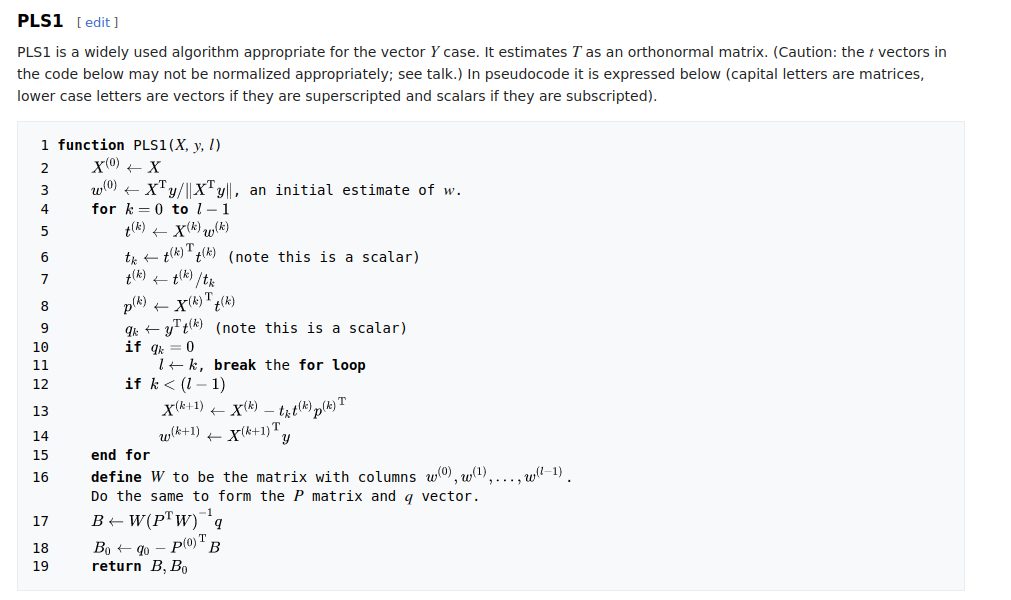

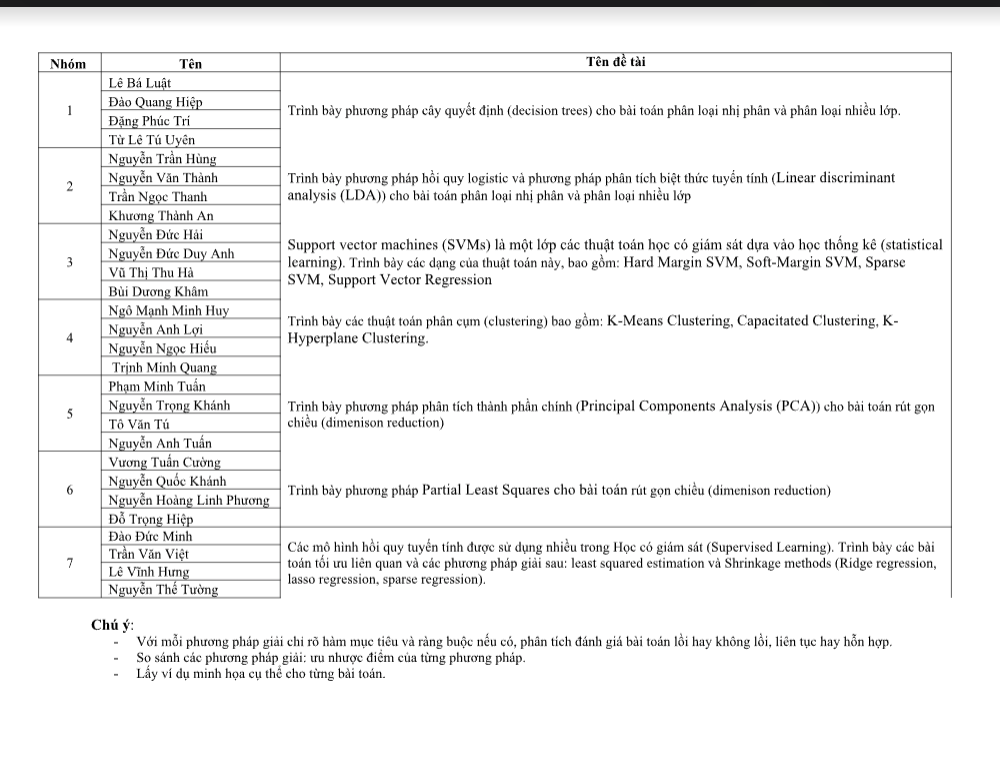
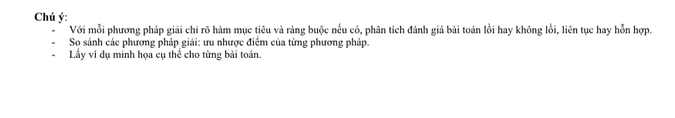

# PLS1

In [1]:
%cd ..

/home/nyanmaruk/Code/Uni/Numerical_methods/NumericalAlgorithms


Loop 0
Xk [[ 1  2  3]
 [ 4  5  6]
 [ 7  8  9]
 [10 11 12]]
wk [0.50257071 0.57436653 0.64616234]
Loop 1
Xk [[ 0.99720643  1.99681891  2.99643139]
 [ 3.99318368  4.99223814  5.99129259]
 [ 6.98916094  7.98765737  8.98615379]
 [ 9.9851382  10.98307659 11.98101499]]
wk [69.8916094  79.87657365 89.86153791]
Loop 2
Xk [[ 0.99720628  1.99681874  2.9964312 ]
 [ 3.99318333  4.99223774  5.99129214]
 [ 6.98916038  7.98765673  8.98615307]
 [ 9.98513743 10.98307572 11.98101401]]
wk [69.89160379 79.87656726 89.86153074]
Loop 3
Xk [[ 0.99720614  1.99681858  2.99643102]
 [ 3.99318298  4.99223733  5.99129169]
 [ 6.98915982  7.98765609  8.98615236]
 [ 9.98513666 10.98307484 11.98101303]]
wk [69.89159817 79.87656087 89.86152357]
Loop 4
Xk [[ 0.99720599  1.99681841  2.99643083]
 [ 3.99318263  4.99223693  5.99129124]
 [ 6.98915926  7.98765545  8.98615164]
 [ 9.98513589 10.98307396 11.98101204]]
wk [69.89159256 79.87655448 89.8615164 ]
Loop 5
Xk [[ 0.99720585  1.99681825  2.99643065]
 [ 3.99318227  4.99223

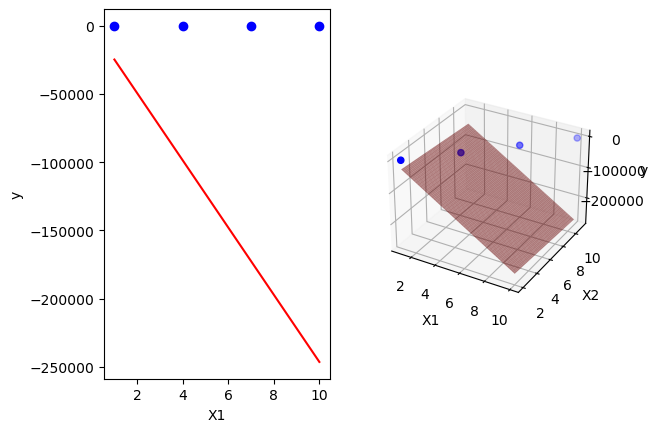

In [2]:
import numpy as np
from numpy.linalg import LinAlgError

from utils import *

class PLS1Alg():
    def __init__(self,X,y,l):
        self.X = X
        self.y = y
        if l <= 26:
            self.l = l  
        else:
            raise ValueError("l must be less than 26")
        self.B = None
        self.B0 = None
    
    def PLS1(self):
        try:
            n, m = self.X.shape
            W = np.zeros((m, self.l))
            P = np.zeros((m, self.l))
            q = np.zeros(self.l)
            B = np.zeros(self.l)
            Xk = self.X.copy()
            wk = Xk.T @ self.y / np.linalg.norm(Xk.T @ self.y)
            # print(wk.shape)
            for k in range(self.l):
                # print(self.l)
                # print(k)
                print(f"Loop {k}")
                print("Xk", Xk)
                print("wk", wk)
                print("=====================================================")
                assert (wk.reshape(-1,1)).shape == (m, 1)
                tk = Xk @ wk
                tk_norm = (tk.T @ tk)
                tk = (tk/tk_norm).reshape(-1, 1)
                assert tk.shape == (n, 1)
                pk = Xk.T @ tk
                qk = self.y.T @ tk
                # print("qk", qk)
                if np.any(qk) == 0:
                    self.l = k
                    break
                W[:, k] = wk
                P[:, k] = pk.reshape(-1)
                q[k] = qk
                if k < (self.l - 1):
                    if self.l == 1:
                        Xk = Xk - tk_norm*tk.reshape(-1, 1) @ (pk.reshape(1, -1).T)
                    else:
                        Xk = Xk - tk @ pk.T
                    wk = Xk.T @ self.y 
                    print("=====================================================")
                    print("=====================================================")

            P = np.column_stack([P[:, i] for i in range(self.l)])
            W = np.column_stack([W[:, i] for i in range(self.l)])
            # print("Shape of q",q.shape)
            q = q.reshape(-1, 1)
            B = W @ np.linalg.inv(P.T@W) @ q
            B0 = q[0] - P[:, 0].T @ B

            return B, B0
        
        except LinAlgError as e:
            print(f"Error: {e}")
            return None
        
    def fit(self):
        self.B, self.B0 = self.PLS1()
        return self.B, self.B0
    
    def predict(self, X):
        return X @ self.B + self.B0
    


X=np.array([[1,2,3],[4,5,6],[7,8,9],[10,11,12]])
y=np.array([1,2,3,4])

B, B0 = PLS1Alg(X, y, 26).PLS1()
print("B",B)
print("B0",B0)
plot_2and_3D(X, y, B, B0)
# loops = 5
# for i in range(loops):
#     B, B0 = PLS1Alg(X, y, loops).PLS1()
#     if B is not None:
#         plot_2and_3D(X, y, B, B0)
#     else:
#         print("B is None")
#         continue

Loop 0
Xk [[0.62297836 0.16581809 0.55432768 0.64713206 0.48170063 0.17565764]
 [0.4970395  0.07265201 0.81708828 0.75079584 0.23901093 0.63996134]
 [0.54625837 0.21222277 0.14656789 0.89577938 0.53975363 0.45468231]
 [0.04370154 0.58925443 0.8014574  0.91903494 0.25035748 0.64491125]
 [0.0655546  0.53972262 0.12581019 0.35870702 0.9600341  0.91654686]]
wk [0.19896929 0.30865642 0.41665211 0.51026888 0.41945627 0.50519853]
Loop 1
Xk [[ 0.58712467  0.13008964  0.50035573  0.56969898  0.42900433  0.11238715]
 [ 0.45276155  0.02852874  0.75043498  0.65516893  0.17393302  0.56182469]
 [ 0.50616847  0.17227291  0.08621902  0.80919737  0.48083113  0.38393624]
 [-0.00601665  0.53970991  0.72661468  0.81165875  0.17728372  0.55717428]
 [ 0.02084425  0.49516845  0.05850597  0.26214624  0.89432065  0.83764715]]
wk [0.4302492  0.71822179 0.95485796 1.14046352 0.96546895 1.16332775]
Loop 2
Xk [[ 0.57925082  0.12217762  0.48845898  0.55263406  0.41735195  0.09839274]
 [ 0.4430071   0.01872701  0.73

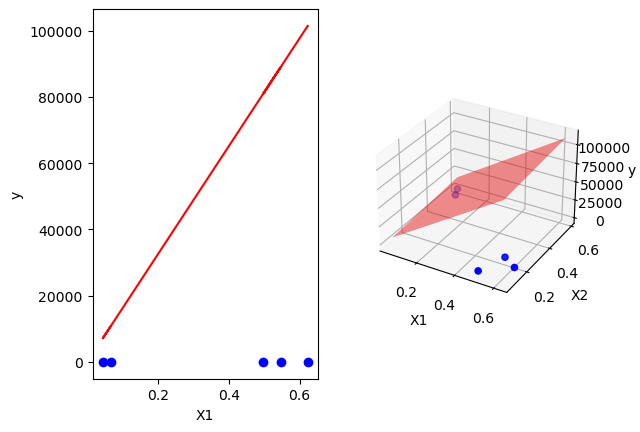

In [3]:
num_samples = 5
random_data_X = np.random.rand(num_samples, 6)
random_data_y = np.random.rand(num_samples)

B, B0 = PLS1Alg(random_data_X, random_data_y, 4).PLS1()
print("B",B)
print("B0",B0)

plot_2and_3D(random_data_X, random_data_y, B, B0)